<a href="https://colab.research.google.com/github/priyash555/fakenewsdetector/blob/master/mp_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 
from getEmbeddings import getEmbeddings
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import backend as K
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Embedding, Input, RepeatVector
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# import scikitplot.plotters as skplt
import os
import nltk

In [ ]:
def plot_cmat(yte, ypred):
    '''Plotting confusion matrix'''
    skplt.plot_confusion_matrix(yte, ypred)
    plt.show()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
if not os.path.isfile('./xtr.npy') or \
    not os.path.isfile('./xte.npy') or \
    not os.path.isfile('./ytr.npy') or \
    not os.path.isfile('./yte.npy'):
    xtr,xte,ytr,yte = getEmbeddings("datasets/train.csv")
    np.save('./xtr', xtr)
    np.save('./xte', xte)
    np.save('./ytr', ytr)
    np.save('./yte', yte)

xtr = np.load('./drive/My Drive/xtr.npy')
xte = np.load('./drive/My Drive/xte.npy')
ytr = np.load('./drive/My Drive/ytr.npy')
yte = np.load('./drive/My Drive/yte.npy')

In [ ]:
def baseline_model():
    '''Neural network with 3 hidden layers'''
    model = Sequential()
    model.add(Dense(256, input_dim=300, activation='relu', kernel_initializer='normal'))
    model.add(Dropout(0.3))
    model.add(Dense(256, activation='relu', kernel_initializer='normal'))
    model.add(Dropout(0.5))
    model.add(Dense(80, activation='relu', kernel_initializer='normal'))
    model.add(Dense(2, activation="softmax", kernel_initializer='normal'))

    # gradient descent
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    
    # configure the learning process of the model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [ ]:
model = baseline_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               77056     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 80)                20560     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 162       
Total params: 163,570
Trainable params: 163,570
Non-trainable params: 0
________________________________________________

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xtr, ytr, test_size=0.2, random_state=42)
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y = np_utils.to_categorical((label_encoder.transform(y_train)))
label_encoder.fit(y_test)
encoded_y_test = np_utils.to_categorical((label_encoder.transform(y_test)))
estimator = model.fit(x_train, encoded_y, epochs=20, batch_size=64)
print("Model Trained!")
score = model.evaluate(x_test, encoded_y_test)
print("")
print("Accuracy = " + format(score[1]*100, '.2f') + "%")   # 92.69%

probabs = model.predict_proba(x_test)
y_pred = np.argmax(probabs, axis=1)

Epoch 1/20
13286/13286 [==============================] - 1s 67us/step - loss: 0.1228 - accuracy: 0.9522
Epoch 2/20
13286/13286 [==============================] - 1s 66us/step - loss: 0.1152 - accuracy: 0.9585
Epoch 3/20
13286/13286 [==============================] - 1s 66us/step - loss: 0.1115 - accuracy: 0.9583
Epoch 4/20
13286/13286 [==============================] - 1s 66us/step - loss: 0.1087 - accuracy: 0.9601
Epoch 5/20
13286/13286 [==============================] - 1s 66us/step - loss: 0.1044 - accuracy: 0.9604
Epoch 6/20
13286/13286 [==============================] - 1s 67us/step - loss: 0.0960 - accuracy: 0.9640
Epoch 7/20
13286/13286 [==============================] - 1s 67us/step - loss: 0.0939 - accuracy: 0.9649
Epoch 8/20
13286/13286 [==============================] - 1s 67us/step - loss: 0.0952 - accuracy: 0.9642
Epoch 9/20
13286/13286 [==============================] - 1s 67us/step - loss: 0.0957 - accuracy: 0.9654
Epoch 10/20
13286/13286 [==============================

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


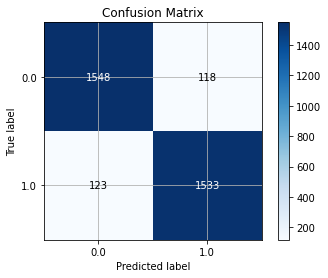

In [ ]:
!pip install -q scikit-plot
import scikitplot.plotters as skplt
plot_cmat(y_test, y_pred)

In [ ]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from collections import Counter
import os
# import getEmbeddings
import matplotlib.pyplot as plt
# import scikitplot.plotters as skplt

Using TensorFlow backend.


In [ ]:
top_words = 5000
epoch_num = 5
batch_size = 64

In [ ]:
def plot_cmat(yte, ypred):
    '''Plotting confusion matrix'''
    skplt.plot_confusion_matrix(yte, ypred)
    plt.show()

In [ ]:
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [ ]:
if not os.path.isfile('./drive/My Drive/xtr_shuffled.npy') or \
    not os.path.isfile('./drive/My Drive/xte_shuffled.npy') or \
    not os.path.isfile('./drive/My Drive/ytr_shuffled.npy') or \
    not os.path.isfile('./drive/My Drive/yte_shuffled.npy'):
    getEmbeddings.clean_data()


xtr = np.load('./drive/My Drive/xtr_shuffled.npy')
xte = np.load('./drive/My Drive/xte_shuffled.npy')
y_train = np.load('./drive/My Drive/ytr_shuffled.npy')
y_test = np.load('./drive/My Drive/yte_shuffled.npy')

np.load = np_load_old

In [ ]:
xtr[3]

'phil kerpen kerpen october 31 2016 remington researchs summary polling data asserted race become increasingly competitive  last week found presidential race hillary clinton held clear advantage week find increasingly competitive race eight days go trump appears holding strong mustwin states colorado remains within margin error data also show pennsylvania moved margin error category presidential race remains competitive move final stretch hillary maintains advantage leading colorado pennsylvania point anything happen said titus bond director remington research group state polling data came sunday also showed closerace trump clinton although polls surveyed fbi director james comeys announcement reopening investigation clinton  via realclearpolitics  florida new york timessiena trump 46 percent clinton 42 percent nbcwall street journalmarist clinton 45 percent trump 44 percent gravis clinton 48 percent trump 47 percent colorado cbs newsyougov clinton 42 percent trump 39 percent arizona c

In [ ]:
cnt = Counter()
x_train = []
for x in xtr:
    x_train.append(x.split())
    for word in x_train[-1]:
        cnt[word] += 1  

# Storing most common words
most_common = cnt.most_common(top_words + 1)
word_bank = {}
id_num = 1
for word, freq in most_common:
    word_bank[word] = id_num
    id_num += 1

In [ ]:
for news in x_train:
    i = 0
    while i < len(news):
        if news[i] in word_bank:
            news[i] = word_bank[news[i]]
            i += 1
        else:
            del news[i]

y_train = list(y_train)
y_test = list(y_test)

In [ ]:
i = 0
while i < len(x_train):
    if len(x_train[i]) > 10:
        i += 1
    else:
        del x_train[i]
        del y_train[i]

In [ ]:
x_test = []
for x in xte:
    x_test.append(x.split())

In [ ]:
for news in x_test:
    i = 0
    while i < len(news):
        if news[i] in word_bank:
            news[i] = word_bank[news[i]]
            i += 1
        else:
            del news[i]

In [ ]:
max_review_length = 500
X_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

# Convert to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words+2, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160064    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,365
Trainable params: 213,365
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epoch_num, batch_size=batch_size)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy= %.2f%%" % (scores[1]*100))

# Draw the confusion matrix


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 16034 samples, validate on 4153 samples
Epoch 1/5
16034/16034 [==============================] - 169s 11ms/step - loss: 0.2888 - accuracy: 0.8811 - val_loss: 0.3676 - val_accuracy: 0.8767
Epoch 2/5
16034/16034 [==============================] - 170s 11ms/step - loss: 0.2897 - accuracy: 0.9048 - val_loss: 0.2191 - val_accuracy: 0.9290
Epoch 3/5
16034/16034 [==============================] - 170s 11ms/step - loss: 0.2307 - accuracy: 0.9093 - val_loss: 0.2385 - val_accuracy: 0.9340
Epoch 4/5
16034/16034 [==============================] - 168s 10ms/step - loss: 0.1813 - accuracy: 0.9344 - val_loss: 0.1868 - val_accuracy: 0.9388
Epoch 5/5
16034/16034 [==============================] - 164s 10ms/step - loss: 0.1119 - accuracy: 0.9620 - val_loss: 0.1940 - val_accuracy: 0.9299
Accuracy= 92.99%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


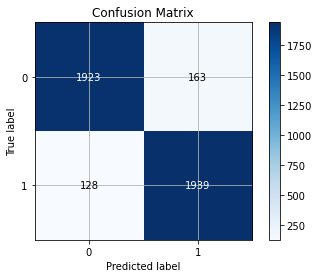

In [ ]:
!pip install -q scikit-plot
import scikitplot.plotters as skplt
y_pred = model.predict_classes(X_test)
plot_cmat(y_test, y_pred)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
